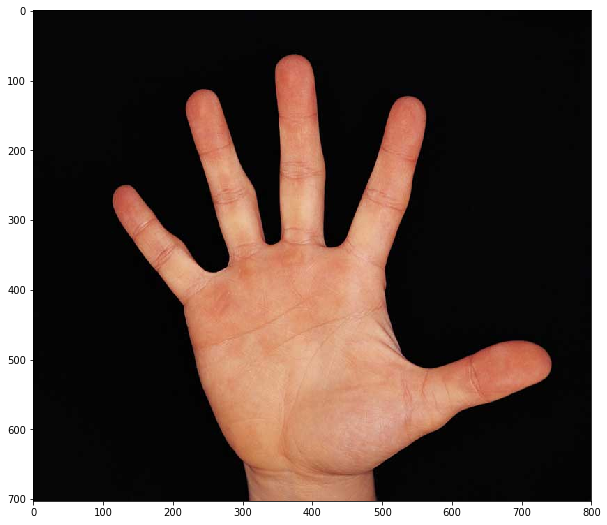

In [50]:
import matplotlib.pyplot as plt
import numpy as np
import cv2

image = cv2.imread('images/hand.jpg')

image_copy = np.copy(image)

image_copy = cv2.cvtColor(image_copy,cv2.COLOR_BGR2RGB)

plt.figure(figsize=(10,10))
plt.imshow(image_copy)

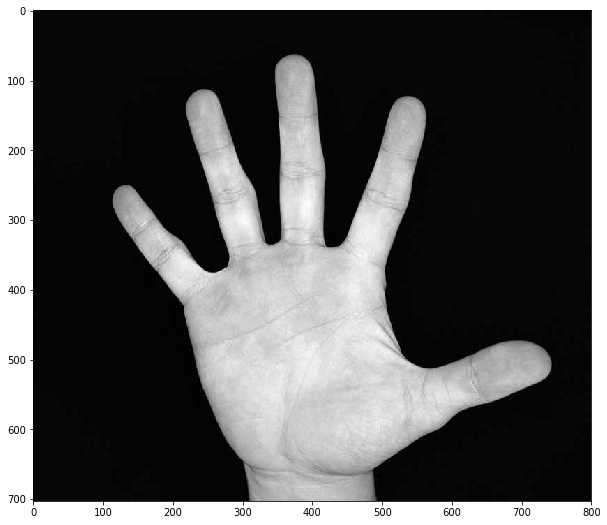

In [51]:
#convert to gray scale
gray_img = cv2.cvtColor(image_copy,cv2.COLOR_RGB2GRAY)

plt.figure(figsize=(10,10))
plt.imshow(gray_img, cmap='gray')

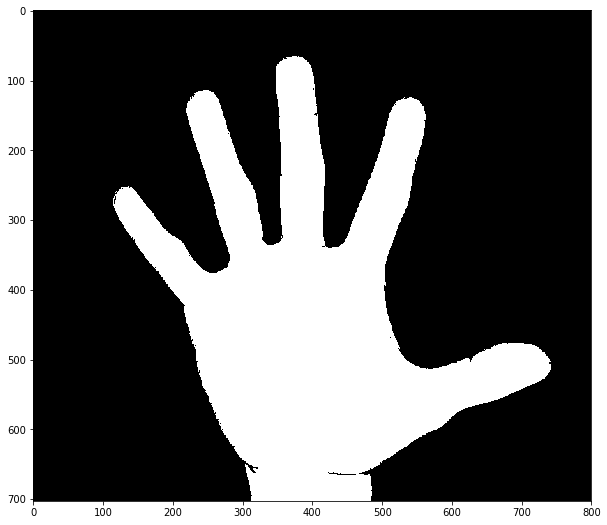

In [52]:
#convert into binary image
retval, binary = cv2.threshold(gray_img, 100, 255, cv2.THRESH_BINARY)

plt.figure(figsize=(10,10))
plt.imshow(binary, cmap='gray')

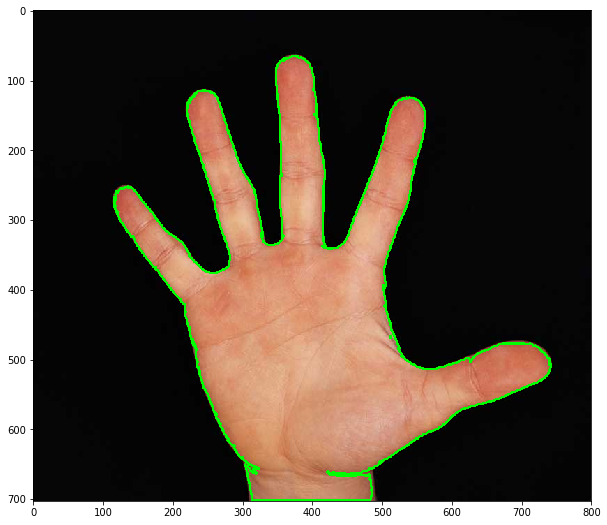

In [53]:
# find contours
contours, hierarchy = cv2.findContours(binary,cv2.RETR_TREE,cv2.CHAIN_APPROX_SIMPLE)

img = np.copy(image_copy)

#draw conntours
cv2.drawContours(img, contours, -1,(0,255,0), 2)

plt.figure(figsize=(10,10))
plt.imshow(img)

In [45]:
def orientations(contours):
    """
    Orientation 
    :param cnt: a list of contours
    :return: the orientations of the contours
    """
    
    # Create an empty list to store the angles in
    # Tip: Use angles.append(value) to add values to this list
    angles = []
    
    for i in range(len(contours)):
        
        # Select the contour from a list
        selected_contour = contours[i]

        # Fit an ellipse to a contour and extract the angle from that ellipse
        (x,y), (MA,ma), angle = cv2.fitEllipse(selected_contour)
        angles.append(angle)
    return angles